In [33]:
! pip install chefboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from chefboost import Chefboost as chef
from chefboost.training import Training
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# EDA for four datasets

## German Credit Data

In [2]:
credit_df = pd.read_csv('german_credit_data.csv')

In [3]:
credit_df.shape

(1000, 11)

In [4]:
credit_df.drop("Unnamed: 0", inplace=True, axis=1)
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
credit_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
credit_df[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']].describe()

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [8]:
#No duplicates
credit_df.duplicated().sum()

0

In [9]:
credit_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

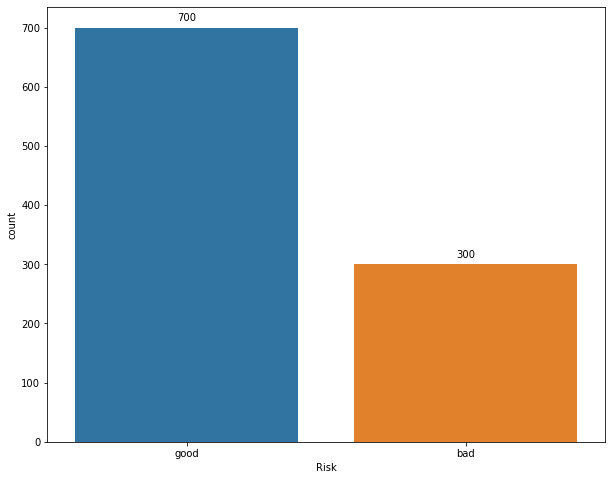

In [10]:
# Check for classes balance
plt.figure(figsize=(10, 8))
y_countplot = sns.countplot(x='Risk', data=credit_df)
# To add annotation to counter plot https://github.com/mwaskom/seaborn/issues/1582
for y in y_countplot.patches:
    y_countplot.annotate(format(y.get_height()), (y.get_x() + y.get_width() / 2., y.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')
plt.show()

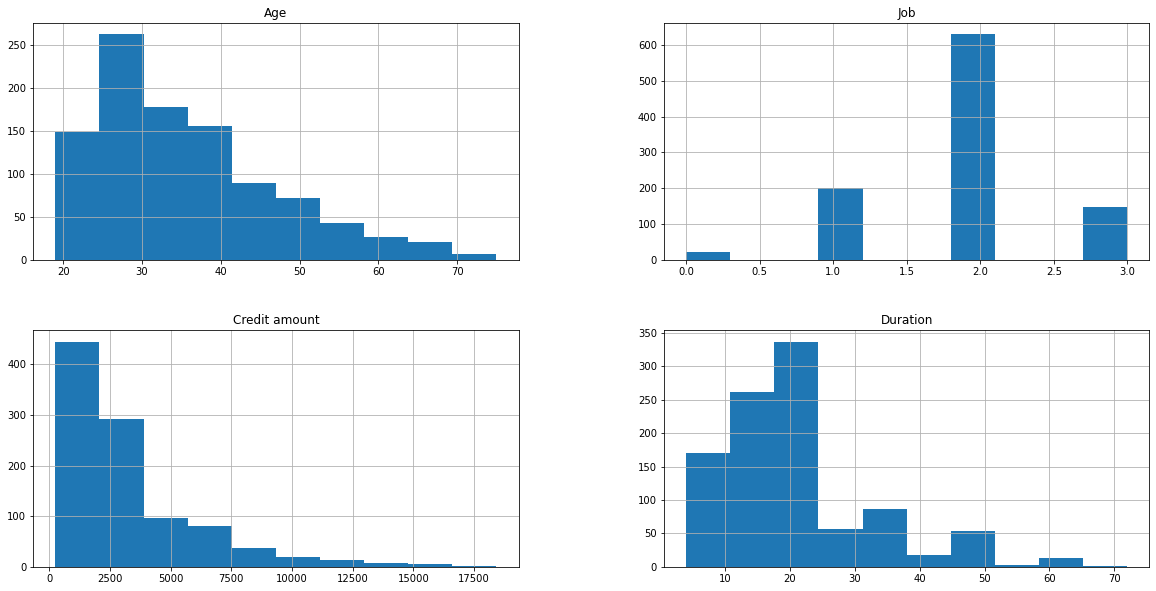

In [11]:
credit_df.hist(figsize=(20, 10))
plt.show()

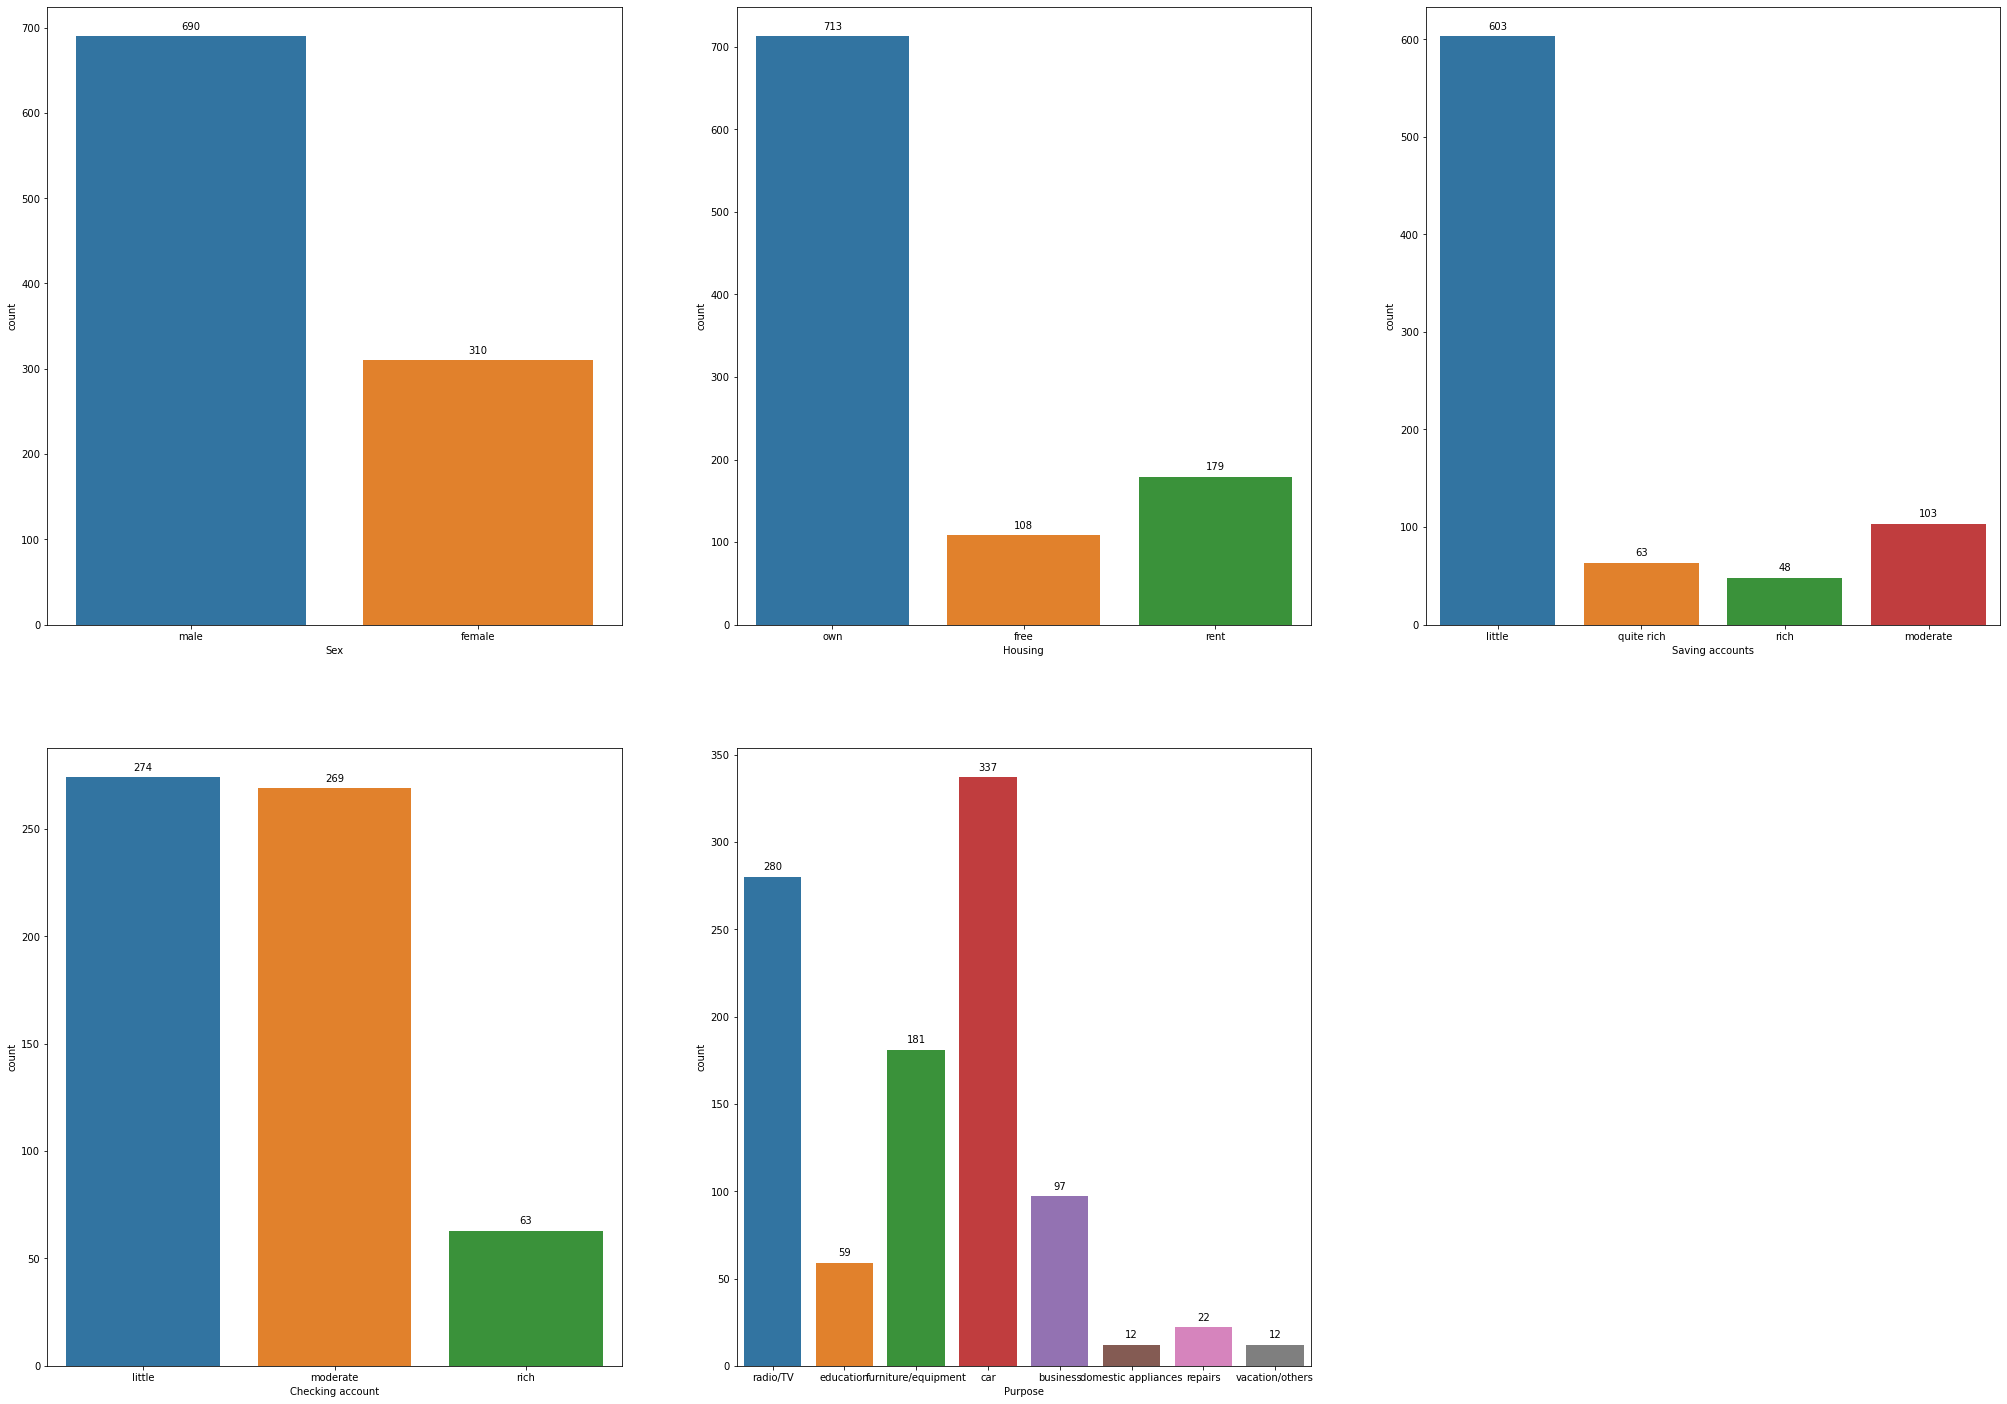

In [12]:
# Categorical features count
plt.figure(figsize=(35, 25))
j = 1
for i in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    plt.subplot(2, 3, j)
    plot = sns.countplot(x=i, data=credit_df)
    # To add annotation to counter plot https://github.com/mwaskom/seaborn/issues/1582
    for z in plot.patches:
        plot.annotate(format(z.get_height()), (z.get_x() + z.get_width() / 2.,z.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords= 'offset points')
    j += 1
#plt.tight_layout()

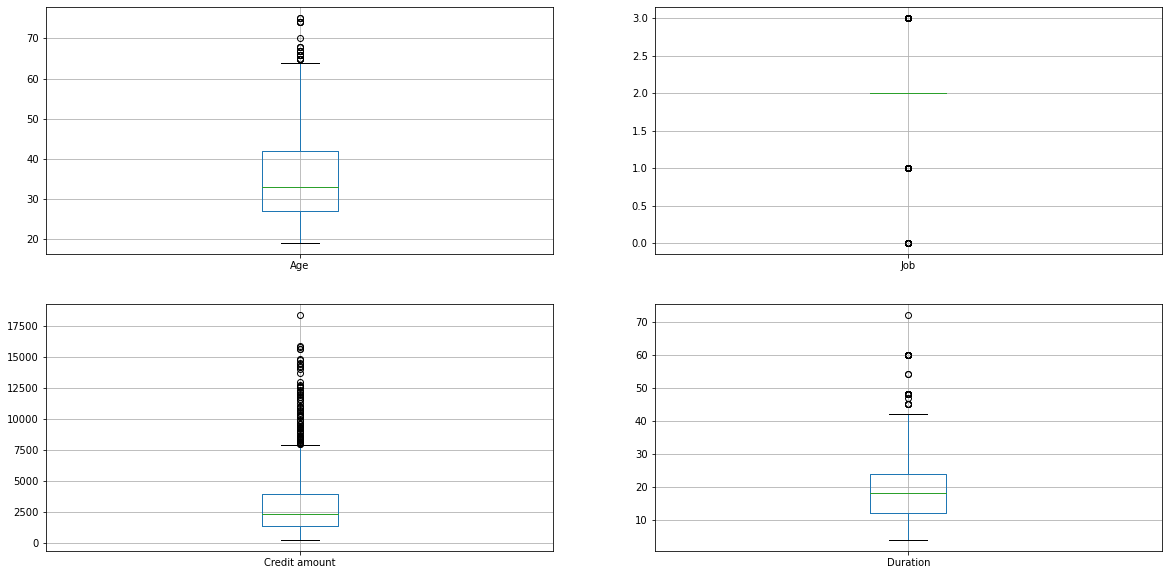

In [13]:
# Numerical feature boxplot
plt.figure(figsize=(20, 10))
j = 1
for i in ['Age', 'Job', 'Credit amount', 'Duration']:
    plt.subplot(2, 2, j)
    credit_df.boxplot([i])
    j += 1
plt.show()

## Red Wine Quality Dataset

In [14]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
wine_df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

There are 12 variables in this dataset. The quality variable is the dependent variable.

In [16]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
wine_df.isnull().sum() # there are no null variables in this dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

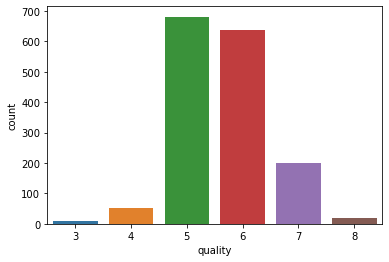

In [18]:
sns.countplot(x = 'quality',data = wine_df) # This dataset is unbalanced

<AxesSubplot:>

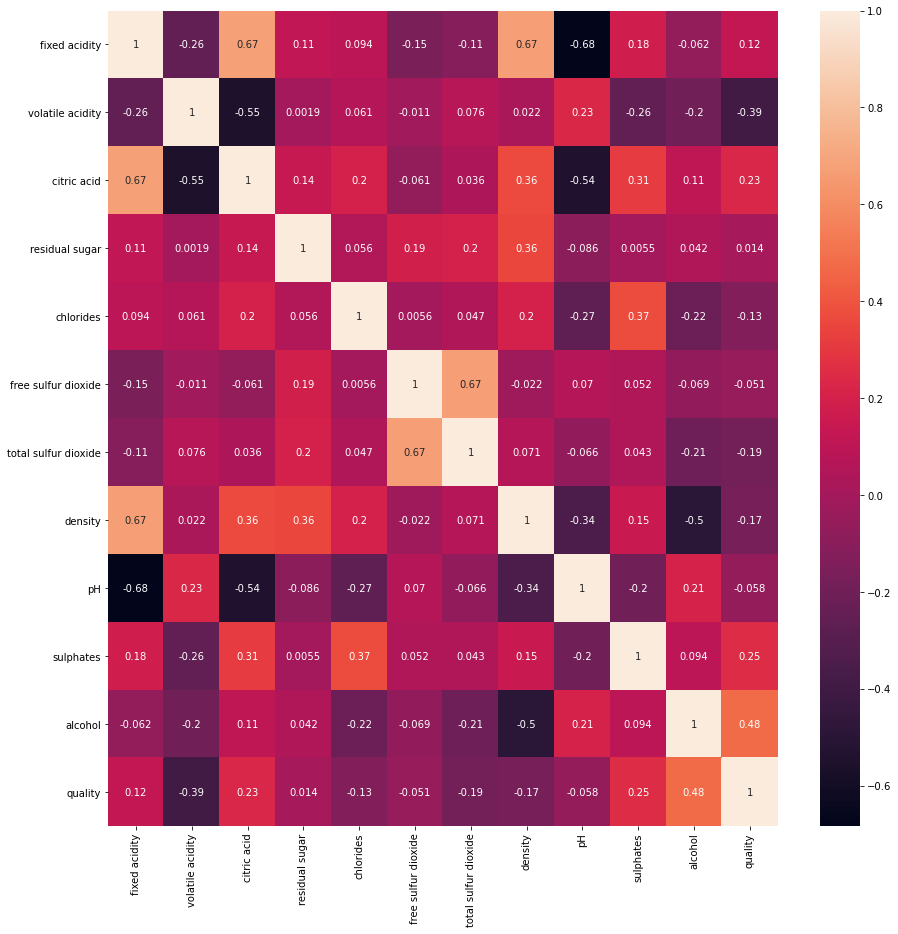

In [19]:
plt.figure(figsize = (15, 15))
sns.heatmap(wine_df.corr(), annot = True)

Fixed acidity, citric acid, residual sugar, sulphates, and alcohol have positive correlation with quality of the red wine. Volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, and pH have negative correlation with quality of the red wine. Alcohol has the strongest correlation and volatile acidity has the weakest correlation. 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

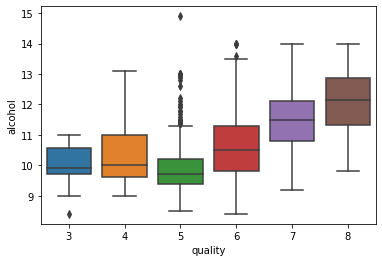

In [20]:
sns.boxplot(x='quality', y='alcohol', data = wine_df) 
# a box plot between alcohol concentration and the quality of red wine

Most of the outliers are around wine with quality 5 and 6.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

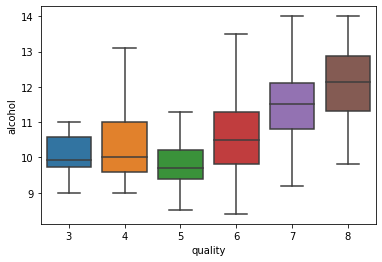

In [21]:
sns.boxplot(x='quality', y='alcohol', data = wine_df, showfliers = False) # removing the outliers

This shows that the higher the alcohol concentration, the higher the quality of the red wine. 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

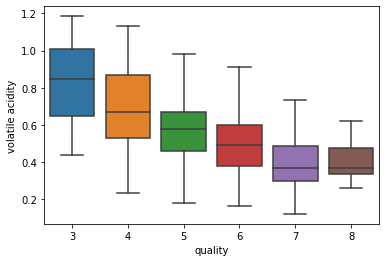

In [22]:
sns.boxplot(x='quality', y='volatile acidity', data = wine_df, showfliers = False)
# a box plot between volatile acidity and the quality of red wine

This shows that the lower the volatile acidity, the lower the quality of the red wine. 

## Adult Income Dataset

In [23]:
adult_df = pd.read_csv('adult.csv')
adult_df.shape

(48842, 15)

In [24]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
#no null values but we can see that some values have ? instead of being null
adult_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#fnlwgt: final weight, the number of people the census believes the entry represents

In [26]:
#replace ? with Null
adult_df = adult_df.replace({'?': None})

In [27]:
#since the target varaible and most columns have zero null values, we will keep rows with missing values for now
adult_df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [28]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
income,,,,,,,,,,,,,,
<=50K,37155,34621,37155,37155,37155,37155,34611,37155,37155,37155,37155,37155,37155,36518
>50K,11687,11422,11687,11687,11687,11687,11422,11687,11687,11687,11687,11687,11687,11467


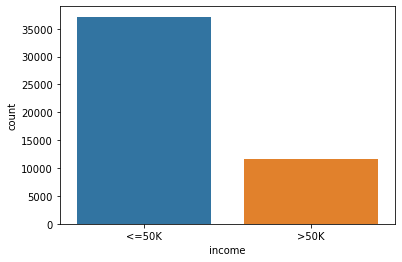

In [29]:
#target variable is imbalanced, 37155 of observations have <=50K income, whereas only 11687 of obervations have >50K income 
sns.countplot(x = 'income',data = adult_df)
adult_df.groupby(['income']).count()

In [30]:
#we see that average age and hours-per-week for people with higher income is bigger than those with lower income
adult_df.groupby(['income']).mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
<=50K,36.872184,190039.565523,9.598493,147.010308,54.151931,38.840048
>50K,44.275178,188470.574570,11.602807,4042.239497,193.528964,45.452896


<AxesSubplot:>

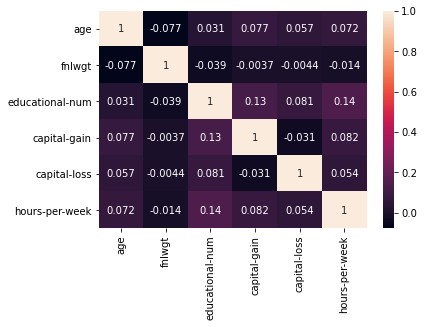

In [31]:
#there is almost no correlation between the numerical variables 
sns.heatmap(adult_df.corr(), annot = True)

Text(0.5, 1.0, 'Age Distribution')

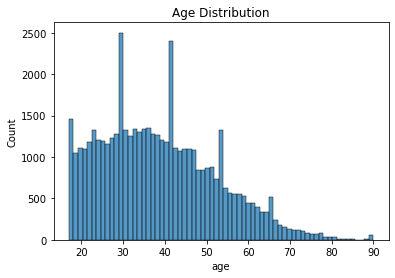

In [32]:
sns.histplot(adult_df['age']).set_title('Age Distribution')

<AxesSubplot:xlabel='race', ylabel='count'>

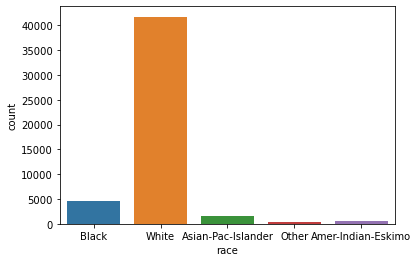

In [33]:
#mostly white 
sns.countplot(x = 'race',data = adult_df)

<AxesSubplot:xlabel='marital-status', ylabel='count'>

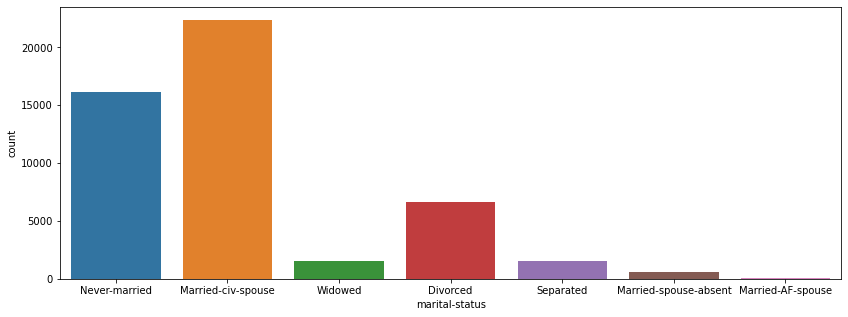

In [34]:
#marital status
plt.figure(figsize = (14, 5))
sns.countplot(x = 'marital-status',data = adult_df)

## First Artificial Dataset

Below is the plot of first two features. This artificial dataset is generated by clusters. So it should be easily classified using decision tree.

Text(0.5, 1.0, 'centers = 1')

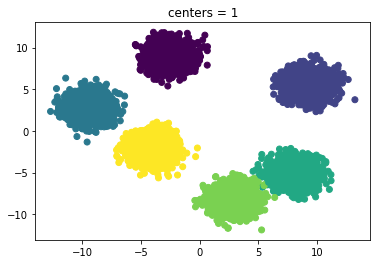

In [35]:
X_first_Artificial, y_first_Artificial = make_blobs(n_samples=10000, centers=6, n_features=50, random_state=42)
plt.figure()
plt.scatter(X_first_Artificial[:, 0], X_first_Artificial[:, 1], c=y_first_Artificial)
plt.title('centers = 1')

In [36]:
First_Artificial_df = pd.DataFrame(X_first_Artificial,columns = ['1','2','3','4','5','6','7','8','9','10',
                                                                 '11','12','13','14','15','16','17','18','19','20',
                                                                 '21','22','23','24','25','26','27','28','29','30',
                                                                '31','32','33','34','35','36','37','38','39','40',
                                                                '41','42','43','44','45','46','47','48','49','50'])
First_Artificial_df['Target'] = y_first_Artificial
First_Artificial_df = First_Artificial_df.astype({'Target': str})
First_Artificial_df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Target
0,1.854219,-9.060577,-7.232399,7.227770,2.572563,-8.730482,-8.234146,2.511572,-9.501312,-7.471581,...,9.323758,7.489954,-4.160673,-9.704390,8.573475,-1.526214,8.851264,9.613553,7.679215,4
1,9.939457,6.778171,6.626757,7.540728,1.737359,10.220870,-7.704547,-7.651377,-8.560570,-2.308869,...,3.626161,5.001714,2.124524,4.688919,-2.002352,-0.483564,-2.042922,-10.853955,-7.429156,1
2,-2.890680,8.273078,5.869009,1.480427,-7.406035,-7.009404,-7.413813,8.454689,1.627452,5.388237,...,0.737992,-10.574369,8.987061,-5.768191,2.901303,-3.578547,0.756729,0.999648,-6.904023,0
3,-10.904661,2.020141,-3.994983,-0.336483,8.675776,-5.841990,-2.059752,5.727782,-5.066964,-8.254719,...,-3.701461,-0.569896,-4.114273,-5.685315,-9.449179,2.647983,-0.741426,-6.773020,-3.246508,2
4,-9.043613,3.969191,-3.873651,-0.368633,6.702187,-6.097934,-1.724966,4.614626,-4.072308,-8.463715,...,-7.120681,1.733112,-3.172827,-3.424101,-7.519322,2.917195,0.601631,-8.920533,-4.882397,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-3.298360,-2.218802,7.650568,-3.798930,-4.968472,0.674801,9.891845,3.108257,2.770372,-7.872692,...,-9.476315,6.972136,-1.616442,-6.148266,1.807619,4.269969,-4.799725,1.808289,-8.228015,5
9996,2.404995,-11.688830,-7.976660,9.190847,1.092916,-11.408768,-7.207712,4.212871,-10.141461,-4.546530,...,9.247690,8.923760,-1.036454,-10.910371,8.664794,-2.204789,10.145391,9.848158,7.734300,4
9997,8.890477,6.413765,9.917613,8.037167,1.768751,7.957030,-9.710832,-6.805011,-7.649407,-3.452350,...,2.564628,6.054286,1.128983,4.971394,0.532394,3.089073,-1.410564,-8.384327,-7.998574,1
9998,7.501087,-5.717805,-7.510483,2.016763,10.128403,-5.662872,3.723761,5.927484,-4.815790,3.531143,...,8.028043,8.001702,2.931943,-3.222410,-3.044454,4.482912,8.802346,8.094691,4.703666,3


## Second Artificial Dataset

This artificial dataset has the same sample size and number of features. However, there are only 45 useful informative features, and remaining 5 features are redundant which means they are linear combination of other features. In addition, there are 5% percent of the data whose class is randomly assigned, so there exists nosiy data. Finally, I make the shift = 1, which means shift features by 1 each time so the range of each features varies. Details referred to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

Text(0.5, 1.0, 'centers = 1')

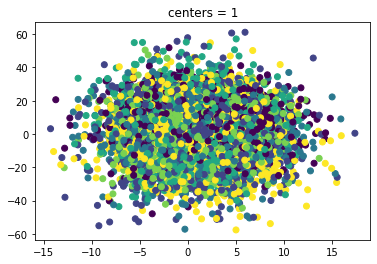

In [37]:
X_sec_Artificial,y_sec_Artificial = make_classification(n_samples = 10000, n_features = 50, n_informative = 45, n_redundant = 5, n_repeated = 0, n_classes = 6,
                                                        n_clusters_per_class = 2, flip_y = 0.05, shift = 1, random_state = 42)
plt.figure()
plt.scatter(X_sec_Artificial[:, 0], X_sec_Artificial[:, 1], c=y_sec_Artificial)
plt.title('centers = 1')

In [38]:
Sec_Artificial_df = pd.DataFrame(X_sec_Artificial,columns = ['1','2','3','4','5','6','7','8','9','10',
                                                                 '11','12','13','14','15','16','17','18','19','20',
                                                                 '21','22','23','24','25','26','27','28','29','30',
                                                                '31','32','33','34','35','36','37','38','39','40',
                                                                '41','42','43','44','45','46','47','48','49','50'])
Sec_Artificial_df['Target'] = y_sec_Artificial
Sec_Artificial_df = Sec_Artificial_df.astype({'Target': str})
Sec_Artificial_df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Target
0,0.142372,32.657288,-7.730448,4.720582,1.568258,2.442761,-5.157877,6.716322,2.629221,5.684133,...,-2.458382,0.333226,2.951268,-2.972412,-3.706380,7.316846,8.735795,-5.489070,-4.914978,3
1,-2.896494,-12.510719,2.946461,-2.668396,-0.916305,-0.200334,-1.743985,3.699803,1.157818,-1.296849,...,1.498790,0.056741,0.282126,-0.087357,1.906403,3.332812,-1.338653,1.961578,-0.152210,4
2,0.460402,-8.905278,-1.459329,10.314049,-8.029972,0.952764,3.177931,0.552431,4.700898,-4.111621,...,-1.126098,0.018442,-7.940069,-2.379509,9.708477,2.935679,0.990688,5.356984,-4.454972,3
3,-4.089833,-5.590670,6.458277,1.337546,-0.796803,-2.234344,4.424185,1.359940,2.527629,-6.601302,...,6.303319,0.135782,-4.201287,1.495373,-1.308058,0.652483,1.597269,3.120452,-4.842632,1
4,2.650668,-8.724004,-2.215812,4.123960,4.956644,-0.742299,5.031477,6.396224,-2.342482,-0.834182,...,1.524804,0.277295,0.661463,4.958045,-0.386429,5.735642,3.811054,0.731921,2.344960,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.100735,15.213364,5.007623,-0.830010,7.672774,2.355998,-3.455195,6.957364,2.364012,-1.447949,...,0.381977,1.778054,-5.518729,0.189646,5.517031,2.921632,6.155448,3.960628,0.596587,2
9996,-5.561415,-12.735165,-0.478836,-0.179195,4.838815,-2.575770,-3.031419,1.560054,0.946963,-2.940964,...,5.277907,0.949151,0.661492,1.844777,-0.908655,-2.014638,1.295149,-0.759301,-0.098660,0
9997,2.293387,0.643975,4.390060,2.035321,-6.289045,7.044275,0.652907,0.624932,-2.940570,-3.411253,...,0.711627,-2.065676,-0.998032,0.451014,5.997824,1.828278,2.586465,-0.991920,2.510131,1
9998,7.082020,-13.758995,4.209430,4.613442,2.037272,-1.826698,4.832830,-4.439513,-1.451344,-2.721861,...,0.486363,8.394068,-2.682590,-9.243019,5.381615,2.910121,3.595655,-2.280110,1.252699,2


# Algorithm Implementation Starts Here

## ID3

### A. German Credit Dataset

In [72]:
credit_df_ID3_1 = credit_df.copy()
credit_df_ID3_2 = credit_df.copy()
credit_df_ID3_3 = credit_df.copy()

#### 1. Build ID3 model with null values

In [73]:
config = {'algorithm': 'ID3'}
credit_model_no_bin = chef.fit(credit_df_ID3_1, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  16.78615403175354  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  89.4 % on  1000  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[673, 79], [27, 221]]
Precision:  89.4947 %, Recall:  96.1429 %, F1:  92.6998 %


In [74]:
credit_df_ID3_1['Saving accounts'] = credit_df_ID3_1['Saving accounts'].fillna('no_inf')
credit_df_ID3_1['Checking account'] = credit_df_ID3_1['Checking account'].fillna('no_inf')
config = {'algorithm': 'ID3'}
credit_model_no_bin = chef.fit(credit_df_ID3_1, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  16.7072970867157  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  91.7 % on  1000  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[684, 67], [16, 233]]
Precision:  91.0786 %, Recall:  97.7143 %, F1:  94.2798 %


#### 2. Build ID3 model with no binning (treat continuous variables as categorical variables)

In [75]:
# Fill NaN 
credit_df_ID3_2['Saving accounts'] = credit_df_ID3_2['Saving accounts'].fillna('no_inf')
credit_df_ID3_2['Checking account'] = credit_df_ID3_2['Checking account'].fillna('no_inf')
# Change to String type
credit_df_ID3_2.Age = credit_df_ID3_2.Age.astype(str)
credit_df_ID3_2.Job = credit_df_ID3_2.Job.astype(str)
credit_df_ID3_2.Duration = credit_df_ID3_2.Duration.astype(str)
credit_df_ID3_2['Credit amount'] = credit_df_ID3_2['Credit amount'].astype(str)

In [76]:
# Train Test Split
credit_df_X = credit_df_ID3_2.drop("Risk", axis = 1)
credit_df_Y = credit_df_ID3_2["Risk"]
credit_df_X_train, credit_df_X_test, credit_df_y_train, credit_df_y_test = train_test_split(credit_df_X, credit_df_Y, test_size=.2, random_state = 31)

In [77]:
credit_df_train = pd.concat([credit_df_X_train, pd.DataFrame(credit_df_y_train)], axis=1)

In [78]:
config = {'algorithm': 'ID3'}
credit_model_ID3_2 = chef.fit(credit_df_train, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  47.647764921188354  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  800  instances
Labels:  ['bad' 'good']
Confusion matrix:  [[235, 0], [0, 565]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [79]:
credit_df_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
545,43,male,2,free,little,little,1333,24,car,bad
215,39,female,1,own,no_inf,moderate,932,6,education,good
589,60,male,2,own,little,little,2246,12,furniture/equipment,bad
582,26,female,2,rent,little,no_inf,1388,9,furniture/equipment,good
544,61,male,1,own,little,no_inf,1255,12,car,good
...,...,...,...,...,...,...,...,...,...,...
610,22,female,2,own,moderate,little,741,12,domestic appliances,bad
894,29,male,2,own,no_inf,no_inf,1169,18,radio/TV,good
16,53,male,2,own,no_inf,no_inf,2424,24,radio/TV,good
599,32,male,2,free,little,no_inf,3863,24,business,good


In [80]:
credit_df_test_list = credit_df_X_test.values.tolist()
credit_df_test_pre = []
for item in credit_df_test_list:
    credit_df_test_pre.append(chef.predict(credit_model_ID3_2, item))

In [81]:
correct = 0
for i in range(0,200):
    if credit_df_test_pre[i] == list(credit_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/200)*100)+"%.")

The accuracy for the test dataset is 66.5%.


#### 3. Build ID3 model with binning & Binning the continuos variables age, credit amount and duration

In [41]:
def quantile_bin_label(dataframe, column):
    q_25 = np.percentile(dataframe[dataframe[column] >= 0][column], 25, interpolation = 'midpoint')
    q_50 = np.percentile(dataframe[dataframe[column] >= 0][column], 50, interpolation = 'midpoint')
    q_75 = np.percentile(dataframe[dataframe[column] >= 0][column], 75, interpolation = 'midpoint')
    q_100 = np.percentile(dataframe[dataframe[column] >= 0][column], 100, interpolation = 'midpoint')
    label_column = []
    q_list = list(dataframe[column])
    del dataframe[column]
    for item in q_list:
        if item < q_25:
            label_column.append("1")
        elif item >= q_25 and item < q_50:
            label_column.append("2")
        elif item >= q_50 and item < q_75:
            label_column.append("3")
        else:
            label_column.append("4")
    dataframe[column] = label_column

In [83]:
age_list = []
for age in credit_df_ID3_3.Age:
    if age >= 19 and age < 24:
        age_list.append("1")
    elif age >= 24 and age < 34:
        age_list.append("2")
    elif age >= 34 and age < 44:
        age_list.append("3")
    elif age >= 44 and age < 64:
        age_list.append("4")
    else:
        age_list.append("5")
credit_df_ID3_3.drop("Age", inplace = True, axis =1)
credit_df_ID3_3["Age_1"] = age_list

In [84]:
for column in ["Credit amount", "Duration"]:
    quantile_bin_label(credit_df_ID3_3, column)
credit_df_ID3_3.Job = credit_df_ID3_3.Job.astype(str)
credit_df_ID3_3['Saving accounts'] = credit_df_ID3_3['Saving accounts'].fillna('no_inf')
credit_df_ID3_3['Checking account'] = credit_df_ID3_3['Checking account'].fillna('no_inf')

In [85]:
credit_df_X = credit_df_ID3_3.drop("Risk", axis = 1)
credit_df_Y = credit_df_ID3_3["Risk"]
credit_df_X_train, credit_df_X_test, credit_df_y_train, credit_df_y_test = train_test_split(credit_df_X, credit_df_Y, test_size=.2, random_state = 12345)

In [86]:
credit_df_train = pd.concat([credit_df_X_train, pd.DataFrame(credit_df_y_train)], axis=1)

In [87]:
credit_df_train

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age_1,Credit amount,Duration,Risk
839,male,2,own,little,no_inf,radio/TV,4,3,4,good
195,female,3,own,little,moderate,education,3,2,1,bad
581,male,1,own,little,moderate,car,4,3,2,good
695,male,2,rent,quite rich,no_inf,car,4,1,1,good
35,male,1,own,little,moderate,radio/TV,2,4,4,bad
...,...,...,...,...,...,...,...,...,...,...
420,female,2,rent,rich,no_inf,car,1,3,2,good
129,female,2,own,little,little,car,2,3,2,bad
285,female,1,own,little,little,car,3,4,4,good
485,male,3,own,little,moderate,car,4,1,1,bad


In [88]:
config = {'algorithm': 'ID3'}
credit_model_ID3_3 = chef.fit(credit_df_train, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  46.39098286628723  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  98.25 % on  800  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[548, 8], [6, 238]]
Precision:  98.5612 %, Recall:  98.917 %, F1:  98.7388 %


In [89]:
credit_df_test_list = credit_df_X_test.values.tolist()
credit_df_test_pre = []
for item in credit_df_test_list:
    credit_df_test_pre.append(chef.predict(credit_model_ID3_3, item))

In [90]:
correct = 0
for i in range(0,200):
    if credit_df_test_pre[i] ==list(credit_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/200)*100)+"%.")

The accuracy for the test dataset is 67.5%.


### B. Wine Quality Dataset

In [126]:
wine_df_ID3_1 = wine_df.copy()
wine_df_ID3_2 = wine_df.copy()

#### 1. Build the ID3 model without any binnings and treat target variable as 6 categories

In [127]:
wine_df_ID3_1 = wine_df_ID3_1.astype(str)
wine_df_X = wine_df_ID3_1.drop("quality", axis = 1)
wine_df_Y = wine_df_ID3_1["quality"]
wine_df_X_train, wine_df_X_test, wine_df_y_train, wine_df_y_test = train_test_split(wine_df_X, wine_df_Y, test_size=.2, random_state = 42)

In [128]:
wine_df_train = pd.concat([wine_df_X_train, pd.DataFrame(wine_df_y_train)], axis=1)

In [129]:
config = {'algorithm': 'ID3'}
wine_model_train = chef.fit(wine_df_train, config = config, target_label = 'quality')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  82.30833983421326  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  1279  instances
Labels:  ['6' '5' '4' '7' '8' '3']
Confusion matrix:  [[506, 0, 0, 0, 0, 0], [0, 551, 0, 0, 0, 0], [0, 0, 43, 0, 0, 0], [0, 0, 0, 157, 0, 0], [0, 0, 0, 0, 13, 0], [0, 0, 0, 0, 0, 9]]
Decision  6  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  7  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  8  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [130]:
wine_test_list = wine_df_X_test.values.tolist()
wine_test_pre = []
for item in wine_test_list:
    wine_test_pre.append(chef.predict(wine_model_train, item))

In [131]:
correct = 0
for i in range(0,320):
    if wine_test_pre[i] ==list(wine_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/320)*100)+"%.")

The accuracy for the test dataset is 50.625%.


#### 2. Binning all continuous columns

In [42]:
wine_df_ID3_2.quality = wine_df_ID3_2.quality.astype(str)
for item in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    quantile_bin_label(wine_df_ID3_2, item)

NameError: name 'wine_df_ID3_2' is not defined

In [133]:
wine_df_X_2 = wine_df_ID3_2.drop("quality", axis = 1)
wine_df_Y_2 = wine_df_ID3_2["quality"]
wine_df_X_train_2, wine_df_X_test_2, wine_df_y_train_2, wine_df_y_test_2 = train_test_split(wine_df_X_2, wine_df_Y_2, test_size=.2, random_state = 42)

In [134]:
wine_df_train_2 = pd.concat([wine_df_X_train_2, pd.DataFrame(wine_df_y_train_2)], axis=1)

In [135]:
config = {'algorithm': 'ID3'}
wine_model_train_2 = chef.fit(wine_df_train_2, config = config, target_label = 'quality')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  90.81515097618103  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  99.29632525410477 % on  1279  instances
Labels:  ['6' '5' '4' '7' '8' '3']
Confusion matrix:  [[504, 4, 1, 0, 0, 0], [1, 546, 0, 0, 0, 0], [1, 0, 41, 0, 0, 0], [0, 1, 0, 157, 0, 0], [0, 0, 0, 0, 13, 0], [0, 0, 1, 0, 0, 9]]
Decision  6  => Accuray:  99.4527 %, Precision:  99.0177 %, Recall:  99.6047 %, F1:  99.3103 %
Decision  5  => Accuray:  99.5309 %, Precision:  99.8172 %, Recall:  99.0926 %, F1:  99.4536 %
Decision  4  => Accuray:  99.7654 %, Precision:  97.619 %, Recall:  95.3488 %, F1:  96.4705 %
Decision  7  => Accuray:  99.9218 %, Precision:  99.3671 %, Recall:  100.0 %, F1:  99.6825 %
Decision  8  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  99.9218 %, Precision:  90.0 %, Recall:  100.0

In [136]:
wine_test_list_2 = wine_df_X_test_2.values.tolist()
wine_test_pre_2 = []
for item in wine_test_list_2:
    wine_test_pre_2.append(chef.predict(wine_model_train_2, item))

In [137]:
correct = 0
for i in range(0,320):
    if wine_test_pre_2[i] ==list(wine_df_y_test_2)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/320)*100)+"%.")

The accuracy for the test dataset is 57.1875%.


### C. Adult Income Dataset

In [47]:
adult_df_ID3_1 = adult_df.copy()

In [49]:
adult_df_ID3_sample = adult_df_ID3_1.sample(n=10000, random_state = 42)

In [50]:
for item in ["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]:
    quantile_bin_label(adult_df_ID3_sample, item)

In [51]:
adult_df_X = adult_df_ID3_sample.drop("income", axis = 1)
adult_df_Y = adult_df_ID3_sample["income"]
adult_df_X_train, adult_df_X_test, adult_df_y_train, adult_df_y_test = train_test_split(adult_df_X, adult_df_Y, test_size=.2, random_state = 42)

In [52]:
adult_df_train = pd.concat([adult_df_X_train, pd.DataFrame(adult_df_y_train)], axis=1)

In [53]:
config = {'algorithm': 'ID3'}
adult_df_model_train = chef.fit(adult_df_train, config = config, target_label = 'income')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  711.7131729125977  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.025 % on  8000  instances
Labels:  ['<=50K' '>50K']
Confusion matrix:  [[5828, 194], [284, 1694]]
Precision:  96.7785 %, Recall:  95.3534 %, F1:  96.0607 %


In [54]:
adult_df_test_list = adult_df_X_test.values.tolist()
adult_df_test_pre = []
for item in adult_df_test_list:
    adult_df_test_pre.append(chef.predict(adult_df_model_train, item))

In [55]:
correct = 0
for i in range(0,2000):
    if adult_df_test_pre[i] ==list(adult_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

The accuracy for the test dataset is 76.55%.


### D. First Artificial Dataset

In [ ]:
First_Artificial_df_ID3_1 = First_Artificial_df.copy()
First_Artificial_df_ID3_2 = First_Artificial_df.copy()

#### 1. Build model with train test split

In [ ]:
ID3_X_1 = First_Artificial_df_ID3_1.drop("Target", axis = 1)
ID3_Y_1 = First_Artificial_df_ID3_1["Target"]
ID3_X_train_1, ID3_X_test_1, ID3_y_train_1, ID3_y_test_1 = train_test_split(ID3_X_1, ID3_Y_1, test_size=.2, random_state = 42)

In [ ]:
first_train_ID3_1 = pd.concat([ID3_X_train_1, pd.DataFrame(ID3_y_train_1)], axis=1)

In [ ]:
first_train_ID3_1

In [ ]:
config = {'algorithm': 'ID3'}
first_model_train_ID3_1 = chef.fit(first_train_ID3_1, config = config, target_label = 'Target')
chef.save_model(first_model_train_ID3_1, "first_model_train_ID3_1.pkl")

In [ ]:
first_test_list_ID3_1 = ID3_X_test_1.values.tolist()
first_test_pre = []
for item in first_test_list_ID3_1:
    first_test_pre.append(chef.predict(first_model_train_ID3_1, item))

In [ ]:
correct = 0
for i in range(0,2000):
    if first_test_pre[i] ==list(ID3_y_test_1)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

#### 2. Train the whole dataset with increasing features

In [ ]:
temp = ['Target']
for i in range(1,51):
    temp.append(str(i))
    first_model_train_ID3_2 = chef.fit(First_Artificial_df_ID3_2[temp], config = config, target_label = 'Target')

In [ ]:
accuracy_list = [33.34, 64.49, 97.96, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
num_features = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50]
plt.plot(num_features, accuracy_list)
plt.title('Accuracy vs Num of features')
plt.xlabel('Num of Features')
plt.ylabel('Accuracy')
plt.show()

### E. Second Artificial Dataset

In [ ]:
Sec_Artificial_df_ID3_1 = Sec_Artificial_df.copy()
Sec_Artificial_df_ID3_2 = Sec_Artificial_df.copy()

#### 1. Build model with train test split and test whether overfitting 

In [ ]:
for column in ['1','2','3','4','5','6','7','8','9','10',
               '11','12','13','14','15','16','17','18','19','20',
               '21','22','23','24','25','26','27','28','29','30',
               '31','32','33','34','35','36','37','38','39','40',
               '41','42','43','44','45','46','47','48','49','50']:
    quantile_bin_label(Sec_Artificial_df_ID3_1, column)

In [ ]:
ID3_X_2 = Sec_Artificial_df_ID3_1.drop("Target", axis = 1)
ID3_Y_2 = Sec_Artificial_df_ID3_1["Target"]
ID3_X_train_2, ID3_X_test_2, ID3_y_train_2, ID3_y_test_2 =
train_test_split(ID3_X_2, ID3_Y_2, test_size=.2, random_state = 42)

In [ ]:
sec_train_ID3_1 = pd.concat([ID3_X_train_2, pd.DataFrame(ID3_y_train_2)], axis=1)

In [ ]:
sec_train_ID3_1

In [ ]:
config = {'algorithm': 'ID3'}
sec_model_train_ID3_1 = chef.fit(sec_train_ID3_1, config = config, target_label = 'Target')
chef.save_model(sec_model_train_ID3_1, "sec_model_train_ID3_1.pkl")

In [ ]:
sec_test_list = ID3_X_test_2.values.tolist()
sec_test_pre = []
for item in sec_test_list:
    sec_test_pre.append(chef.predict(sec_model_train_ID3_1, item))

In [ ]:
correct = 0
for i in range(0,2000):
    if sec_test_pre[i] ==list(ID3_y_test_2)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

# C4.5

### A. German Credit Dataset

### B. Wine Quality Dataset

### C. Adult Income Dataset

### D. First Artificial Dataset

### E.Second Artificial Dataset

# CART

### A. German Credit Dataset

### B. Wine Quality Dataset

### C. Adult Income Dataset

### D. First Artificial Dataset

### E.Second Artificial Dataset

# CHAID

### A. German Credit Dataset

### B. Wine Quality Dataset

### C. Adult Income Dataset

In [ ]:
#renaming income to be decision in order to fit the model since it only recognizes the target variable as Decision
adult_df = adult_df.rename(columns={"income": "Decision"})

In [ ]:
X = adult_df.iloc[:,:-1]
y = adult_df.Decision
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [ ]:
train_data = pd.concat([X_train, Y_train], axis=1)
train_data

In [ ]:
#took so long so I tested on 80% of the data
config = {"algorithm": "CHAID"}
chaid_tree = cb.fit(train_data, config)

### D. First Artificial Dataset

### E.Second Artificial Dataset